In [1]:
import pandas as pd

data = pd.read_csv("/content/Real estate.csv")
data_ = data.copy()

data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
data.drop(columns = ["No", "X1 transaction date", "X5 latitude", "X6 longitude"], axis = 1, inplace = True)

In [9]:
data.shape

(414, 4)

In [10]:
data.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193
std,11.392485,1262.109595,2.945562,13.606488
min,0.000000,23.382840,0.000000,7.600000
25%,9.025000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.150000,1454.279000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,117.500000


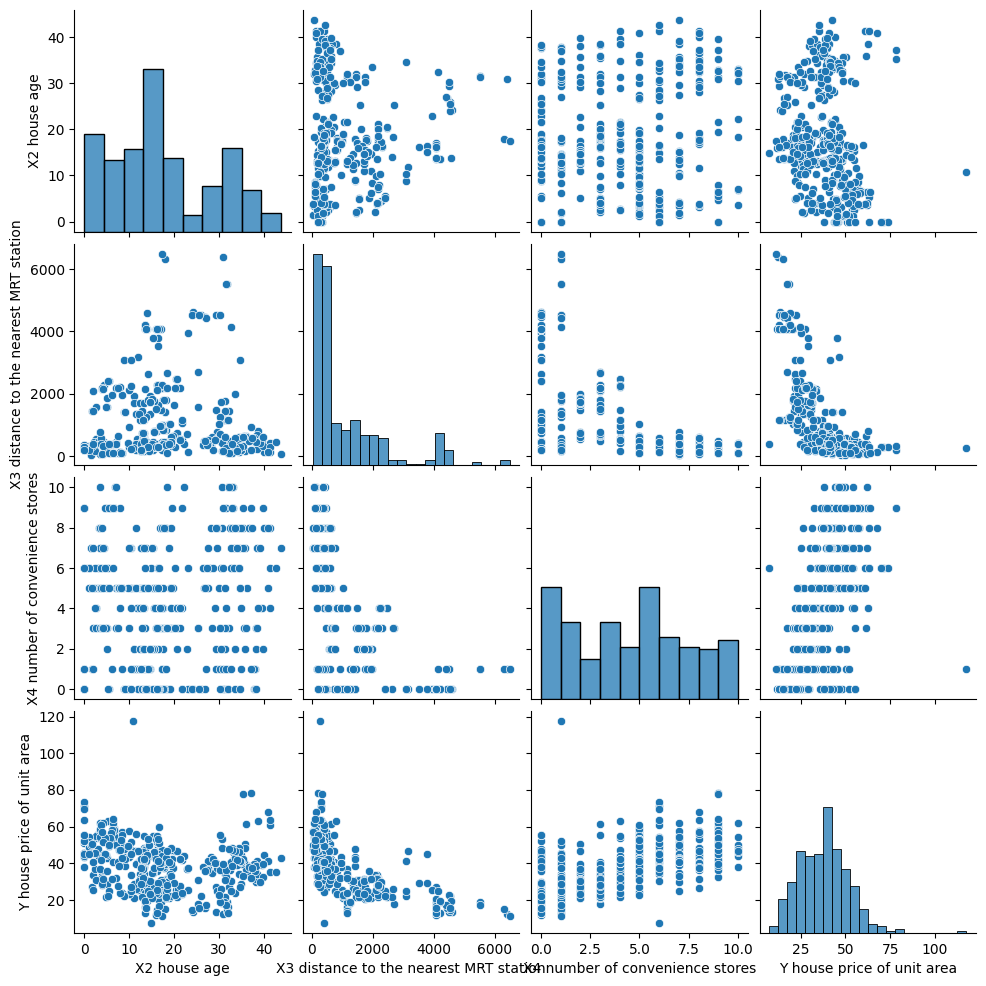

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()

In [12]:
# find the pairwise correlation of all columns in the data
data.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,-0.210567,-0.673613,0.571005,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

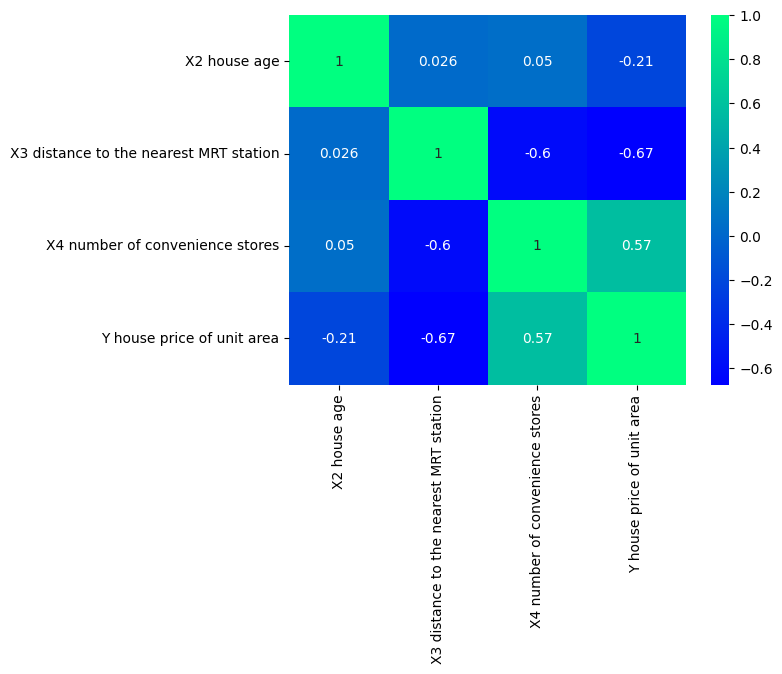

In [13]:
#Heatmap for correlation
sns.heatmap(data.corr(), annot = True, cmap = "winter")
plt.show

In [14]:
y = data['Y house price of unit area']
x = data.drop(columns = 'Y house price of unit area', axis = 1)

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state = 0, test_size = 0.2)


In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [35]:
pd.DataFrame({"Y_test": y_test, "Y_pred": pred, "Residual": y_test - pred}).head(10)

,Y_test,Y_pred,Residual
356,45.3,46.938845,-1.638845
170,14.4,19.080561,-4.680561
224,46.0,40.484530,5.515470
331,15.6,19.363429,-3.763429
306,50.2,44.957461,5.242539
325,38.1,41.417937,-3.317937
150,48.5,43.406573,5.093427
10,41.4,35.566632,5.833368
21,51.6,47.411064,4.188936
268,40.1,42.182068,-2.082068


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)

metrics = pd.DataFrame([r2, mae, mse, rmse], columns = ["Metrics"],\
                       index = ["R2", "MAE", "MSE", "RMSE"])

print(metrics)

        Metrics
R2     0.729912
MAE    5.157190
MSE   46.914086
RMSE   6.849386
